Part II
---


| Var | (a, sigma^2) | n | q | k | Rule | Law |
| --- | --- | --- | --- | --- | --- | --- |
| 5 | (0;9) | 60 | 1.75 | 3 | Стерджеса | Треугольное на отрезке (-2, 4) и модой, равной 1 |


how to move for random.triagualar -> stats.triang

c = (mode - left) / (right - left)

loc = left

scale = right - left

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import pandas as pd
import math
import statistics

# consts  
n = 6000
a = 0
sigma = 3
q = 1.75

left = -2
right = 4
mode = 1

a = (left+right+mode)/3

my_c = (mode - left)/(right-left)
my_loc = left
my_scale = right-left

a

1.0

In [3]:
sts.chi2.ppf((1-0.95)/2,99)

73.36108019128368

Task 1


In [2]:
sample = np.random.triangular(left, mode, right, size=n)
print(sample)

[ 0.48335694  1.14863359 -1.4377887  ...  3.46365554  1.24786759
 -0.06745684]


0.4237641727739643


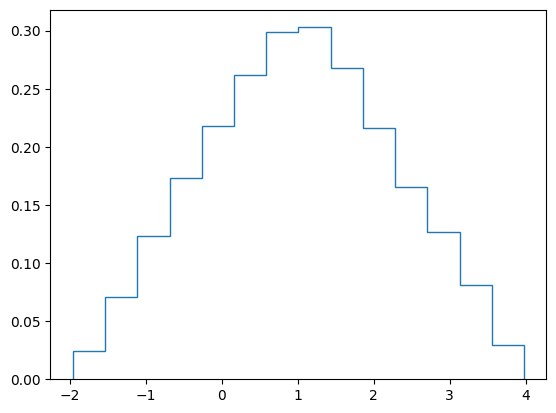

In [3]:
counts, bins = np.histogram(sample, bins="sturges")
h = abs(bins[1]-bins[0])
counts2 = counts/(h*n)
plt.stairs(counts2, bins)

print(h)

In [4]:
n_intervals = int(1 + 3.32*math.log10(n))+1
min_smpl = sample.min()
max_smpl = sample.max()
h = (max_smpl-min_smpl)/n_intervals

print(f"Количество интервалов: {n_intervals}\nДлина интервала: {h}\nМаксимальный: {max_smpl}\nМинимальный элемент: {min_smpl} ")

Количество интервалов: 14
Длина интервала: 0.4237641727739643
Максимальный: 3.977861865031685
Минимальный элемент: -1.9548365538038146 


In [5]:
intervals = []
for i in range(0, n_intervals):
    print(f'{i+1} interval: {min_smpl+i*h} - {min_smpl+(i+1)*h}')
    intervals.append(min_smpl+i*h)
intervals.append(min_smpl+n_intervals*h)

1 interval: -1.9548365538038146 - -1.5310723810298503
2 interval: -1.5310723810298503 - -1.107308208255886
3 interval: -1.107308208255886 - -0.6835440354819218
4 interval: -0.6835440354819218 - -0.2597798627079575
5 interval: -0.2597798627079575 - 0.16398431006600678
6 interval: 0.16398431006600678 - 0.587748482839971
7 interval: 0.587748482839971 - 1.0115126556139353
8 interval: 1.0115126556139353 - 1.4352768283878996
9 interval: 1.4352768283878996 - 1.8590410011618639
10 interval: 1.8590410011618639 - 2.282805173935828
11 interval: 2.282805173935828 - 2.7065693467097924
12 interval: 2.7065693467097924 - 3.1303335194837567
13 interval: 3.1303335194837567 - 3.554097692257721
14 interval: 3.554097692257721 - 3.9778618650316853


In [6]:
frequency = []
arraySort = list(sample)
arraySort.sort()
for i in range(0, len(intervals)-1):
    frequency.append(0)
    for j in arraySort:
        if j >= intervals[i] and j <= intervals[i+1]:
            frequency[i] += 1
for i in range(0, len(frequency)):
    print(f'{i+1} interval: {frequency[i]}')
frequency = np.array(frequency)

print(f'\nСумма частот - {(frequency/n).sum()}')

1 interval: 62
2 interval: 181
3 interval: 314
4 interval: 440
5 interval: 555
6 interval: 665
7 interval: 760
8 interval: 770
9 interval: 681
10 interval: 550
11 interval: 420
12 interval: 322
13 interval: 206
14 interval: 74

Сумма частот - 1.0000000000000002


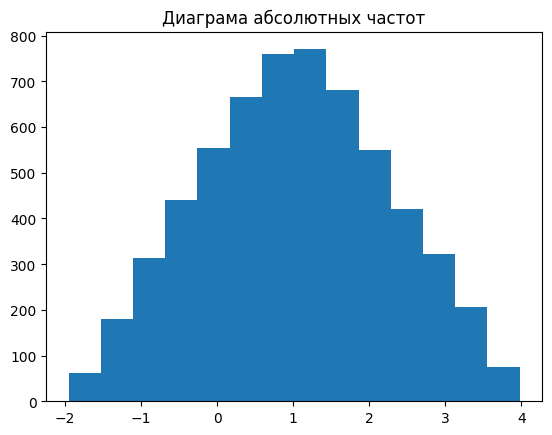

In [7]:
plt.title("Диаграма абсолютных частот")
plt.stairs(frequency, intervals, fill=True)

In [8]:
my_pdf = frequency/(h*n)
for i in range(0, len(my_pdf)):
    print(f'{i+1} interval: {my_pdf[i]}')
# print(f'Сумма абсолютных частот {tmp.sum()}')

1 interval: 0.024384631824090355
2 interval: 0.07118739290581216
3 interval: 0.1234963611736189
4 interval: 0.17305222584838317
5 interval: 0.21828178487693786
6 interval: 0.26154484133903366
7 interval: 0.29890839010175274
8 interval: 0.3028413952346705
9 interval: 0.26783764955170214
10 interval: 0.21631528231047895
11 interval: 0.16518621558254756
12 interval: 0.12664276527995313
13 interval: 0.08101990573810666
14 interval: 0.029104237983591713


[0.02438463 0.07118739 0.12349636 0.17305223 0.21828178 0.26154484
 0.29890839 0.3028414  0.26783765 0.21631528 0.16518622 0.12664277
 0.08101991 0.02910424]
2.3598030797506797


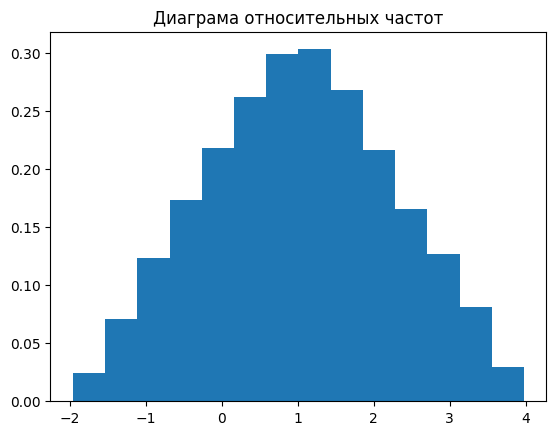

In [9]:
plt.title("Диаграма относительных частот")
plt.stairs(my_pdf, intervals, fill=True)
print(my_pdf)
print(my_pdf.sum())

Task 2

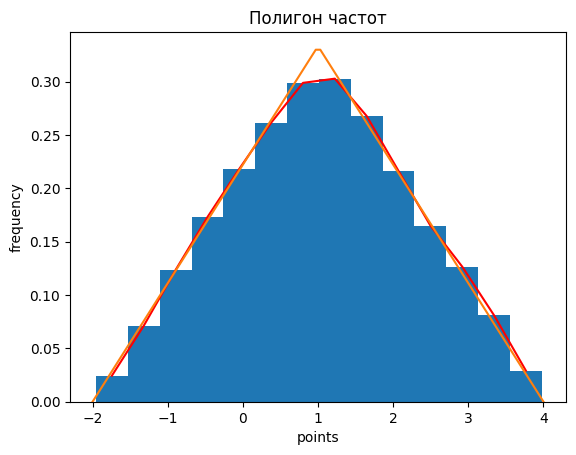

In [10]:
lineY = []
for i in my_pdf:
    lineY.append(i)
lineX = []
for i in range(0, len(intervals)-1):
    lineX.append(intervals[i]+h/2)
plt.stairs(my_pdf, intervals, fill=True)
plt.plot(lineX, lineY, color="red")

x = np.linspace(left, right, 100)
plt.plot(x, sts.triang.pdf(x, c=my_c, loc=my_loc, scale=my_scale))

plt.title('Полигон частот')
plt.xlabel('points')
plt.ylabel('frequency')
plt.show()

In [11]:
# check
proof = 0 
for i in frequency/n/h:
    proof+=i*h
print("Сумма площадей под графиком: ", proof)

Сумма площадей под графиком:  1.0000000000000002


Function graph

In [12]:
arrayGraph = []
tmp1= frequency/n
for i in range(0, len(tmp1)):
    arrayGraph.append(0)
    for j in range (0, i):
        arrayGraph[i]+=tmp1[j]
cdfY = []
for i in arrayGraph:
    cdfY.append(i)
cdfY.append(1)
cdfX = []
for i in intervals:
    cdfX.append(i)


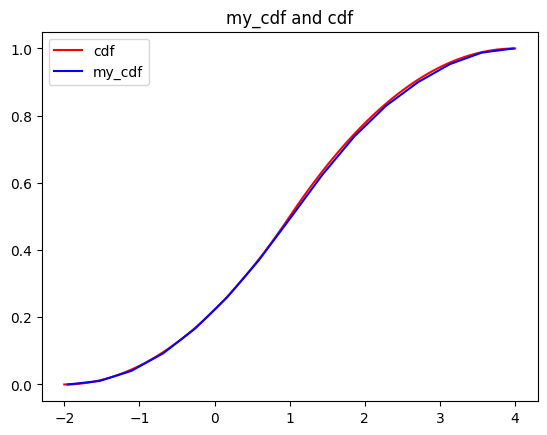

In [13]:
# fig, ax = plt.subplots()
# for i in range(0, len(arrayGraph)):
#     ax.hlines(y=arrayGraph[i], xmin=intervals[i], xmax=intervals[i+1], linewidth=2, color='r')
    
# ax.hlines(y=1, xmin=intervals[len(intervals)-1], xmax=intervals[len(intervals)-1]+10, linewidth=2, color='r')
# ax.hlines(y=0, xmin=intervals[0]-10, xmax=intervals[0], linewidth=2, color='r')
# plt.plot(x, sts.norm.cdf(x, a, sigma))
# ---------------------------------------------------

x = np.linspace(left, right, 100)
plt.plot(x, sts.triang.cdf(x, c=my_c, loc=my_loc, scale=my_scale), color="red")

plt.plot(cdfX, cdfY, color="blue")
plt.legend(['cdf', 'my_cdf'])
plt.title("my_cdf and cdf")
plt.show()

,X
0.25,0.125142
0.50,1.022061
0.75,1.894992


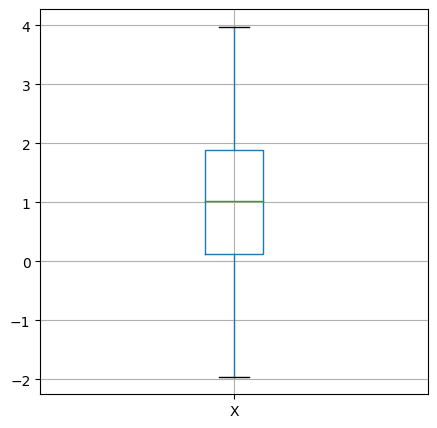

In [14]:
df = pd.DataFrame(data=sample,columns=['X'])
df.boxplot(figsize = (5, 5))
df.quantile([0.25,0.5,0.75])

part 3


In [15]:
print(q)
print(f"Вероятность по lib {sts.triang.cdf(a +(q*sigma), c=my_c, loc=my_loc, scale=my_scale)-sts.triang.cdf(a -(q*sigma), c=my_c, loc=my_loc, scale=my_scale)}")

prob = 0
for i in sample:
    if i>a -(q*sigma) and i<a +(q*sigma):
        prob+=1
prob/=n
print(f"Статистическая {prob}")

a +(q*sigma)

1.75
Вероятность по lib 1.0
Статистическая 1.0


6.25

part 4

In [16]:
tem1 = frequency/n
sample 

my_mean = statistics.mean(sample)
my_variacne = statistics.variance(sample)
my_dev = math.sqrt(my_variacne)
my_skewness = sts.skew(sample)
my_kurtosis = sts.kurtosis(sample)
print(f'mean - {my_mean}, \nvariacne - {my_variacne}, \ndev - {my_dev}, \nSkewness - {my_skewness}, \nKurtosis - {my_kurtosis}')


mean - 1.024867668341428, 
variacne - 1.5202286942616072, 
dev - 1.2329755448757316, 
Skewness - 0.014117683252787807, 
Kurtosis - -0.6276148251295735


In [17]:
X = sample.sum()/len(sample)
print(f'Первый эмпирический момент: {X}')
s2 = 0
for i in sample:
    s2 += (i-X)**2
s2 = s2/len(sample)
print(f'Эмпирическая дисперсия: {s2}')
print(f'Стандартное отклонение: {math.sqrt(s2)}')
print(f'S^2: {(s2)*len(sample)/(len(sample)-1)}')


x4 = 0
s3 = 0
s4 = 0
for i in sample:
    x4 += math.pow(i, 4)
    s3 += math.pow((i-X), 3)
    s4 += math.pow((i-X), 4)
x4 /= len(sample)
s3 /= len(sample)
s4 /= len(sample)
print(f'Коэффициент ассимметрии: {s3/math.pow(math.sqrt(s2), 3)}')
print(f'Коэффициент эксцесса: {s4/math.pow(s2, 2)-3}')

Первый эмпирический момент: 1.0248676683414282
Эмпирическая дисперсия: 1.5199753228125619
Стандартное отклонение: 1.2328727926321361
S^2: 1.5202286942616055
Коэффициент ассимметрии: 0.01411768325278786
Коэффициент эксцесса: -0.6276148251295663
